In [13]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [14]:
iris = load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

In [15]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(iris_df)
scaled_df = pd.DataFrame(scaled_features,columns=iris.feature_names)

In [16]:
scaled_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444


In [17]:
kmeans = KMeans(n_clusters=3, random_state=42)
scaled_df['cluster'] = kmeans.fit_predict(scaled_features)

c:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [18]:
scaled_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),cluster
0,-0.900681,1.019004,-1.340227,-1.315444,1
1,-1.143017,-0.131979,-1.340227,-1.315444,2
2,-1.385353,0.328414,-1.397064,-1.315444,2
3,-1.506521,0.098217,-1.283389,-1.315444,2
4,-1.021849,1.249201,-1.340227,-1.315444,1


In [19]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_features)
scaled_df['pca1'] = pca_result[:, 0]
scaled_df['pca2'] = pca_result[:, 1]

In [20]:
scaled_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),cluster,pca1,pca2
0,-0.900681,1.019004,-1.340227,-1.315444,1,-2.264703,0.480027
1,-1.143017,-0.131979,-1.340227,-1.315444,2,-2.080961,-0.674134
2,-1.385353,0.328414,-1.397064,-1.315444,2,-2.364229,-0.341908
3,-1.506521,0.098217,-1.283389,-1.315444,2,-2.299384,-0.597395
4,-1.021849,1.249201,-1.340227,-1.315444,1,-2.389842,0.646835


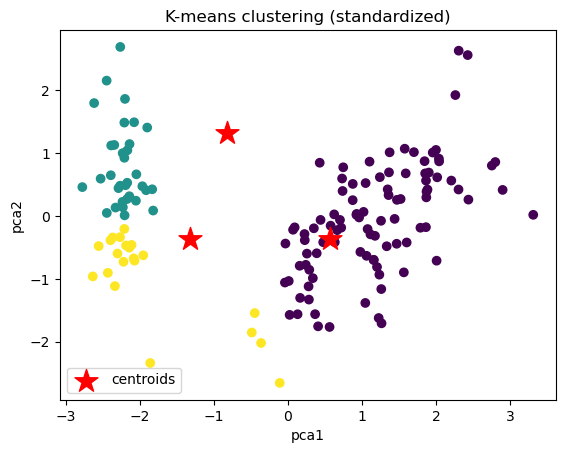

In [21]:
plt.scatter(scaled_df['pca1'], scaled_df['pca2'], c = scaled_df['cluster'], cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=300, marker='*', c='red', label='centroids')
plt.title('K-means clustering (standardized)')
plt.xlabel('pca1')
plt.ylabel('pca2')
plt.legend()
plt.show()

In [22]:
cluster_stats = scaled_df.groupby('cluster')[iris.feature_names].mean()
print("\nCluster Statistics (Mean):")
print(cluster_stats)


Cluster Statistics (Mean):
         sepal length (cm)  sepal width (cm)  petal length (cm)  \
cluster                                                           
0                 0.571004         -0.371768           0.691119   
1                -0.816231          1.318958          -1.286834   
2                -1.327654         -0.373138          -1.137236   

         petal width (cm)  
cluster                    
0                0.663152  
1               -1.219712  
2               -1.114862  


In [25]:
scaled_df['target'] = iris.target
accuracy = sum(scaled_df['cluster'] == scaled_df['target']) / len(scaled_df)
print(f"\nSimple Clustering Accuracy (using original labels for comparison only): {accuracy:.2f}")


Simple Clustering Accuracy (using original labels for comparison only): 0.00


0.0